# Part II - Prosper Loan Data Deck
## by Ngoc Tran

## Investigation Overview

This dataset contains 113,837 records with 81 columns. I selected specific columns to explore patterns and relationships, focusing on:

BorrowerRate
ProsperRating
BorrowerState (grouped by Region)
IsBorrowerHomeOwner
CreditScoreUpperRange
LoanOriginalAmount
LoanOriginationDate
ListingCategory
Year of OriginationDate

The goal is to understand the factors that impact BorrowerRate, LoanOriginalAmount, and Origination Year.

The dataset is provided by Prosper via Udacity.

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
#Load the dataset
df = pd.read_csv(r'C:\Users\ngoct\OneDrive\Documents\UDACITY\Submit_Final\prosperLoanData.csv')
df_stateregion = pd.read_excel(r'C:\Users\ngoct\OneDrive\Documents\UDACITY\Submit_Final\stateregion.xlsx')

#filter some specific columns for my analysis
cols = ['BorrowerRate', 'ProsperRating (numeric)','BorrowerState', 'IsBorrowerHomeowner',
        'CreditScoreRangeUpper', 'LoanOriginalAmount', 'LoanOriginationDate', 'ListingCategory (numeric)', ]
df_subset1 = df[cols]

#group state to region
df_subset = pd.merge(df_subset1,df_stateregion[['BorrowerState','Region']],on='BorrowerState', how='left')

#Rename Specific Columns
df_subset = df_subset.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (numeric)': 'ProsperRating'})

#Convert LoanOriginationDate from object to datetime
df_subset['LoanOriginationDate'] = pd.to_datetime(df_subset['LoanOriginationDate'])

# create a representation of the year with strfmt
df_subset['year_LoanOriginationDate'] = df_subset['LoanOriginationDate'].map(lambda dt: dt.strftime('%Y'))

df_subset['year_LoanOriginationDate']

#Convert year_LoanOriginationDate from object to datetime
df_subset['year_LoanOriginationDate'] = pd.to_datetime(df_subset['year_LoanOriginationDate'])

#subtract the year and month
df_subset['year'] = df_subset['year_LoanOriginationDate'].dt.year


#put CreditScoreRangeUpper into bin
bins = [499, 599, 699, 799, 899]
df_subset['creditscorerangeup_bin'] = pd.cut(df_subset['CreditScoreRangeUpper'], bins)

df_subset.shape

(113937, 12)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

# BorrowerRate Distribution
There is a bell curve from 0.05 to 0.3, with peaks at BorrowerRates of 0.15, 0.2, 0.3, 0.32, and 0.35. The highest number of loans occurs at a BorrowerRate of 0.32. The distribution peaks at 0.15 and gradually decreases until 0.3, with smaller peaks at 0.31 and 0.35. Only six loans have a BorrowerRate greater than 0.4.

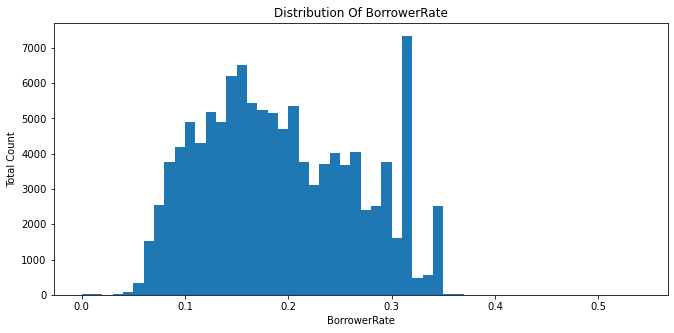

In [3]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 5
bins = np.arange(0, df_subset.BorrowerRate.max() + 0.05, 0.01)
plt.hist(data = df_subset, x = 'BorrowerRate', bins = bins)
plt.xlabel('BorrowerRate')
plt.ylabel('Total Count')
plt.title('Distribution Of BorrowerRate')
plt.grid(False);

# Heatmap Of Numeric Values
From the heatmap, we observe the following:

BorrowerRate has the strongest negative correlation with ProsperRating (-0.95), followed by CreditScoreUpperRange (-0.46) and LoanOriginalAmount (-0.33). This makes sense because a lower ProsperRating typically leads to a higher BorrowerRate, and the same applies to CreditScoreUpperRange. Borrowers with larger loan amounts generally have higher credit scores, indicating lower risk, and are approved for larger loans with lower BorrowerRates compared to borrowers with lower ProsperRatings or CreditScoreUpperRanges.

ProsperRating has the highest negative correlation with BorrowerRate and a positive correlation with both CreditScoreUpperRange and LoanOriginalAmount, which aligns with the relationships mentioned above.

Overall, three key numbers stand out: -0.95 (BorrowerRate vs. ProsperRating), 0.55 (ProsperRating vs. CreditScoreUpperRange), and 0.43 (ProsperRating vs. LoanOriginalAmount).

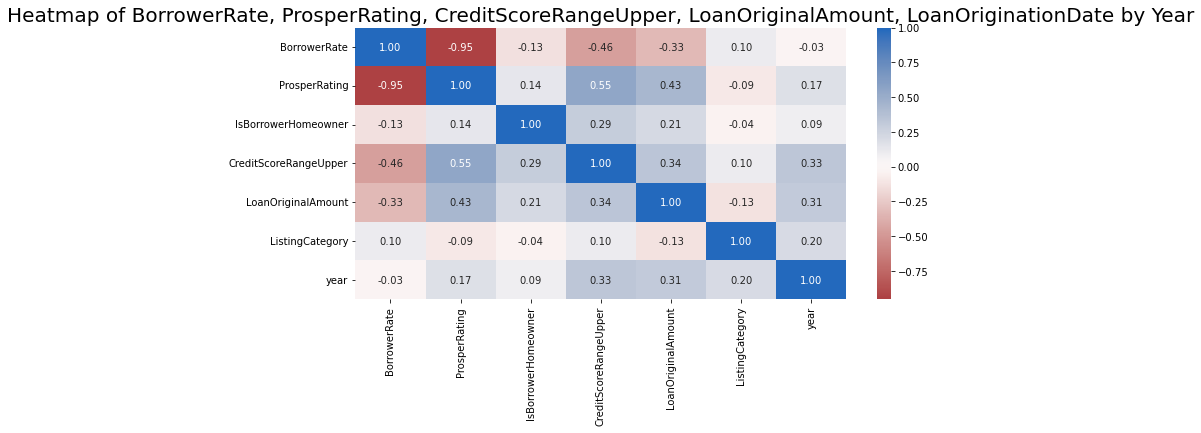

In [4]:
num_var = ['BorrowerRate', 'ProsperRating', 'CreditScoreRangeUpper', 'LoanOriginalAmount']
cat_var = ['IsBorrowerHomeowner', 'ListingCategory', 'Region', 'creditscorerangeup_bin', ]
sb.heatmap(df_subset.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title("Heatmap of BorrowerRate, ProsperRating, CreditScoreRangeUpper, LoanOriginalAmount, LoanOriginationDate by Year", fontsize =20);

# Negative Correlation Between BorrowerRate and LoanOriginalAmount
As LoanOriginalAmount increases, BorrowerRate decreases.

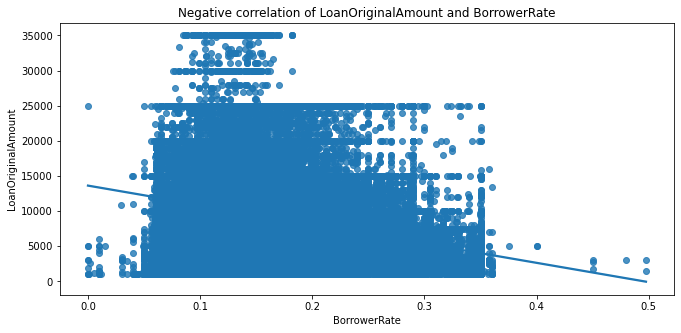

In [5]:
sb.regplot(data = df_subset, x = 'BorrowerRate', y = 'LoanOriginalAmount');
plt.xlabel('BorrowerRate')
plt.ylabel('LoanOriginalAmount')
plt.title ('Negative correlation of LoanOriginalAmount and BorrowerRate');

# Effect of ProsperRating on the Relationship Between BorrowerRate and LoanOriginalAmount
From the chart, the largest LoanOriginalAmounts (shown in purple) appear at ProsperRating 4 and above.
As ProsperRating increases, larger loans become more common, and these larger loans tend to have lower BorrowerRates. 
In contrast, in the low ProsperRating range (1 to 2), there are fewer loans, with most balances under $5k, and these loans have significantly higher BorrowerRates.
ProsperRating 4 is the midpoint, where most loans fall, with BorrowerRates primarily ranging from 0.17 to 0.25.There are only two outliers with BorrowerRates above 0.3.

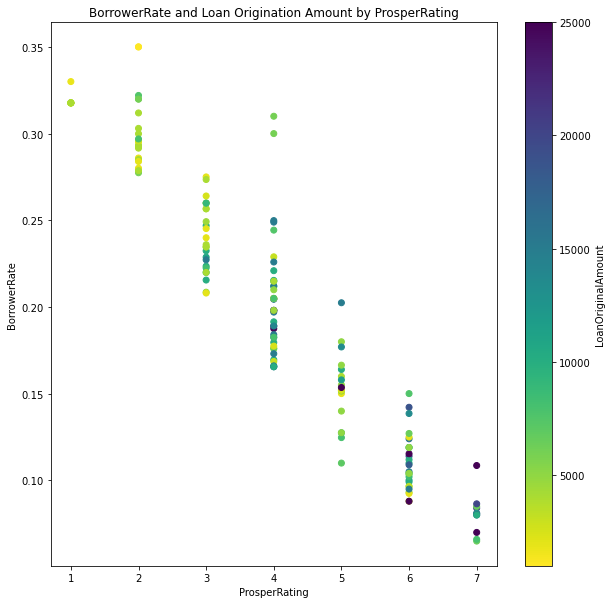

In [6]:
# loading in the data, sampling to reduce points plotted
fuel_econ = df_subset
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]
# plotting the data
plt.figure(figsize = [10,10])
plt.scatter(data = fuel_econ_subset, x = 'ProsperRating', y = 'BorrowerRate', c = 'LoanOriginalAmount',
            cmap = 'viridis_r')
plt.title('BorrowerRate and Loan Origination Amount by ProsperRating')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerRate')
plt.colorbar(label = 'LoanOriginalAmount');

# BorrowerRate Across LoanOriginalAmount and Year of OriginationDate
In 2006, there was minimal loan origination, and the minimum BorrowerRate was relatively high compared to subsequent years.
Loan origination was also low in 2009, likely due to the recession.
The years 2012 and 2013 saw the highest volume of loan originations, with a wide range of BorrowerRates.

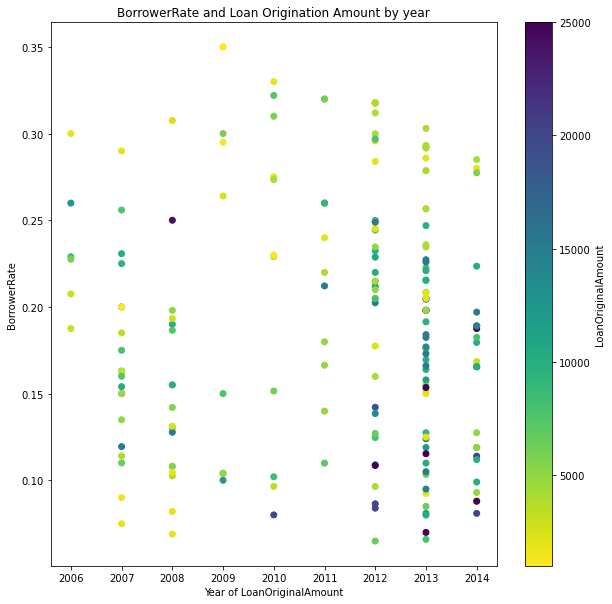

In [7]:
# loading in the data, sampling to reduce points plotted
fuel_econ = df_subset
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]
# plotting the data
plt.figure(figsize = [10,10])
plt.scatter(data = fuel_econ_subset, x = 'year', y = 'BorrowerRate', c = 'LoanOriginalAmount',
            cmap = 'viridis_r')
plt.title('BorrowerRate and Loan Origination Amount by year')
plt.xlabel('Year of LoanOriginalAmount')
plt.ylabel('BorrowerRate')
plt.colorbar(label = 'LoanOriginalAmount');

# LoanOriginalAmount grouped by Year of Origination and CrediScoreRangeUpper
The average LoanOriginalAmount doubled from 2006 to 2014.
For the highest CreditScoreRangeUpper bucket (799-899), the average LoanOriginalAmount exceeded $10,000 from 2011 to 2014.
In the next highest bucket (699-799), the average LoanOriginalAmount above $10,000 was observed in 2007 and again in 2013 to 2014.
For the CreditScoreRangeUpper bucket (599-699), the average LoanOriginalAmount exceeded $10,000 only in 2014.

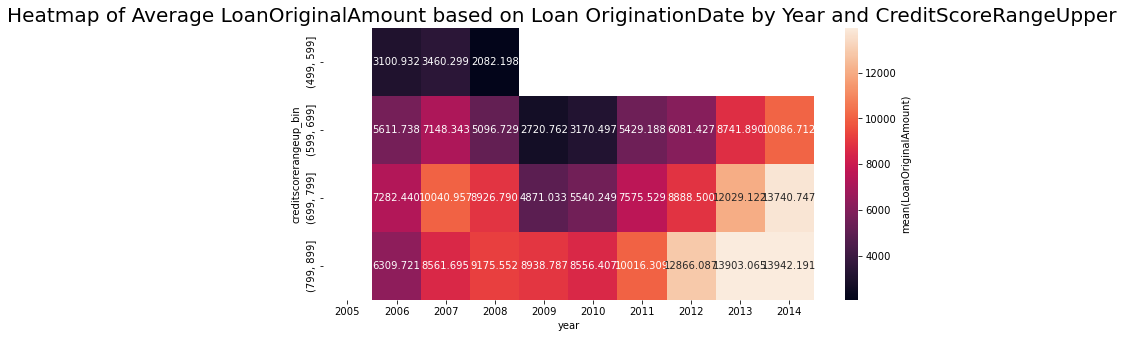

In [8]:
cat_means = df_subset.groupby(['year', 'creditscorerangeup_bin']).mean()['LoanOriginalAmount']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'creditscorerangeup_bin', columns = 'year',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(LoanOriginalAmount)'})
plt.title("Heatmap of Average LoanOriginalAmount based on Loan OriginationDate by Year and CreditScoreRangeUpper  ", fontsize =20);

# Average BorrowerRate grouped by Year of Origination and CrediScoreRangeUpper
Overall, a higher CreditScoreRangeUpper corresponds to a lower average BorrowerRate.

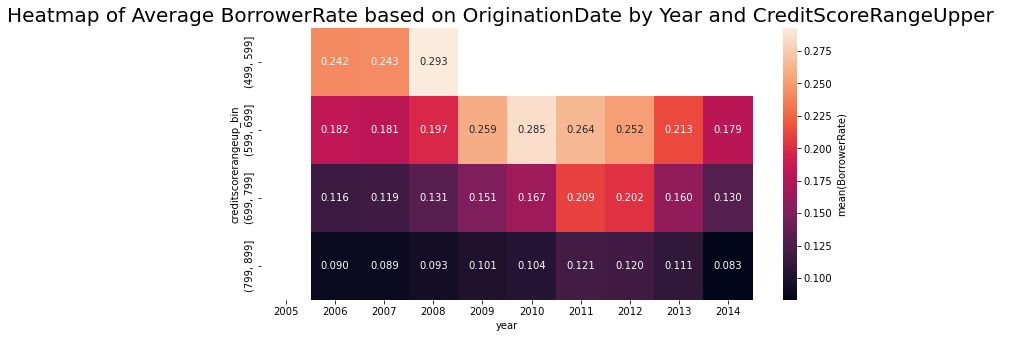

In [9]:
cat_means = df_subset.groupby(['year', 'creditscorerangeup_bin']).mean()['BorrowerRate']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'creditscorerangeup_bin', columns = 'year',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(BorrowerRate)'})
plt.title("Heatmap of Average BorrowerRate based on OriginationDate by Year and CreditScoreRangeUpper  ", fontsize =20);

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [10]:
!jupyter nbconvert Part_II_slide_deck_NewlOanOrigination.ipynb --to slides --post serve --no-input --no-prompt


[NbConvertApp] Converting notebook Part_II_slide_deck_NewlOanOrigination.ipynb to slides
[NbConvertApp] Writing 1016265 bytes to Part_II_slide_deck_NewlOanOrigination.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ngoct\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ngoct\anaconda3\lib\site-packages\jupyter_core\application.py", line 277, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "C:\Users\ngoct\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\ngoct\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "C:\Users\ngoct\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 597, in convert_notebooks
    self.convert_single_notebook(not

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 